In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
ds=pd.read_excel('Data_Analysis_Case_Study_Jun_2021.xlsx')
ds

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Day,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.6500,1042.6500,6,2019-02-15,14:53:00,Credit card,993.00,4.761905,49.6500,6.6
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,6,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,1,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.4900,1039.2900,6,2019-02-08,16:20:00,Credit card,989.80,4.761905,49.4900,8.7
4,283-26-5248,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.2600,1034.4600,4,2019-01-30,20:23:00,Ewallet,985.20,4.761905,49.2600,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,236-86-3015,C,Naypyitaw,Member,Male,Home and lifestyle,13.98,1,0.6990,14.6790,2,2019-02-04,13:38:00,Ewallet,13.98,4.761905,0.6990,9.8
996,192-98-7397,C,Naypyitaw,Normal,Male,Fashion accessories,12.78,1,0.6390,13.4190,3,2019-01-08,14:11:00,Ewallet,12.78,4.761905,0.6390,9.5
997,279-62-1445,C,Naypyitaw,Member,Female,Fashion accessories,12.54,1,0.6270,13.1670,5,2019-02-21,12:38:00,Cash,12.54,4.761905,0.6270,8.2
998,308-39-1707,A,Yangon,Normal,Female,Fashion accessories,12.09,1,0.6045,12.6945,7,2019-01-26,18:19:00,Credit card,12.09,4.761905,0.6045,8.2


In [3]:
# 1. Shape
ds.shape

(1000, 18)

In [4]:
# 1. DataType
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Day                      1000 non-null   int64         
 11  Date                     1000 non-null   datetime64[ns]
 12  Time                     1000 non-n

In [5]:
# 1. To check missing values
ds.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Day                        0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
 # To Replace 1,2,3... as Monday, Tuesday, Wednesday ...
ds["Day"].replace(to_replace=[1,2,3,4,5,6,7],value=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],inplace=True)

In [7]:
# 2. To count items in columns
col_name=['Branch','City','Customer type','Gender','Product line','Day','Payment']
for i in col_name:
    print("Total Count of column",i," : ",ds[i].value_counts().sum())
    print("Distinct Count of items in column",i," : \n",ds[i].value_counts())
    print('\n')

Total Count of column Branch  :  1000
Distinct Count of items in column Branch  : 
 A    340
B    332
C    328
Name: Branch, dtype: int64


Total Count of column City  :  1000
Distinct Count of items in column City  : 
 Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64


Total Count of column Customer type  :  1000
Distinct Count of items in column Customer type  : 
 Member    501
Normal    499
Name: Customer type, dtype: int64


Total Count of column Gender  :  1000
Distinct Count of items in column Gender  : 
 Female    501
Male      499
Name: Gender, dtype: int64


Total Count of column Product line  :  1000
Distinct Count of items in column Product line  : 
 Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64


Total Count of column Day  :  1000
Distinct Count of items in column Day  : 
 Saturday  

In [8]:
# 3. Total Sale Amount and % of contribution
print("Total Sale Amount is : Rs. {:.2f}".format(ds['Total'].sum()))
print("\n% Contributed by men is ",499/1000,"% and Amount is Rs. {:.2f}".format((ds['Total'].sum())*0.49))
print("\n% Contributed by wpmen is ",501/1000,"% and Amount is Rs. {:.2f}".format((ds['Total'].sum())*0.51))

Total Sale Amount is : Rs. 322966.75

% Contributed by men is  0.499 % and Amount is Rs. 158253.71

% Contributed by wpmen is  0.501 % and Amount is Rs. 164713.04


In [9]:
# 4. Branch location in city
ds_groupby_1=ds[['Branch','City']]
ds_branch=ds_groupby_1.groupby(['Branch','City']).sum()
ds_branch

,
Branch,City
A,Yangon
B,Mandalay
C,Naypyitaw


In [10]:
# 5. City wise sales amount & max. and min.
ds_groupby_2=ds[['City','Total']]
ds_city_sale=ds_groupby_2.groupby(by='City').sum()
ds_city_sale

,Total
City,
Mandalay,106197.6720
Naypyitaw,110568.7065
Yangon,106200.3705


In [11]:
# 5. City with maximum sale
ds_city_sale.max()

Total    110568.7065
dtype: float64

In [12]:
# 5. City with minimum sale
ds_city_sale.min()

Total    106197.672
dtype: float64

In [13]:
# 6. Maximum Payment method used by Male and Female
ds_groupby_3=ds[['Gender','Payment']].value_counts()
ds_Max_Payment=ds_groupby_3.groupby(['Gender','Payment']).sum()
ds_Max_Payment

Gender  Payment    
Female  Cash           178
        Credit card    163
        Ewallet        160
Male    Cash           166
        Credit card    148
        Ewallet        185
dtype: int64

In [14]:
# 7. Day wise sale
ds_groupby_4=ds[['Day','Total']]
ds_day_sale=ds_groupby_4.groupby(by='Day').sum()
ds_day_sale

,Total
Day,
Friday,43926.3405
Monday,37899.0780
Saturday,56120.8095
Sunday,44457.8925
Thursday,45349.2480
Tuesday,51482.2455
Wednesday,43731.1350


In [15]:
# 7. Maximum sale in Day
ds_day_sale.max()

Total    56120.8095
dtype: float64

In [16]:
# 8. Total amount of tax collected by cities
ds_groupby_5=ds[['City','Tax 5%']]
ds_tax=ds_groupby_5.groupby(by='City').sum()
print("City wise Total Tax : \n")
print(ds_tax)
print('\n The Total amount of tax collected in all cities is Rs. ',ds_tax.sum())

City wise Total Tax : 

              Tax 5%
City                
Mandalay   5057.0320
Naypyitaw  5265.1765
Yangon     5057.1605

 The Total amount of tax collected in all cities is Rs.  Tax 5%    15379.369
dtype: float64


In [17]:
# 8. City paid Highest tax 
ds_tax.max()

Tax 5%    5265.1765
dtype: float64

In [18]:
# 8. City paid lowest tax
ds_tax.min()

Tax 5%    5057.032
dtype: float64

<AxesSubplot:>

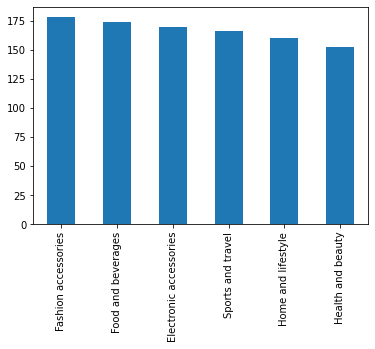

In [19]:
# 9. Analysis_1
ds_analysis_1=ds['Product line']
ds_analysis_1.value_counts().plot(kind='bar')

From the above analysis,
    It shows that, more people spent in " Fashion accessories " And less people spent in " Health and beauty ".

<AxesSubplot:>

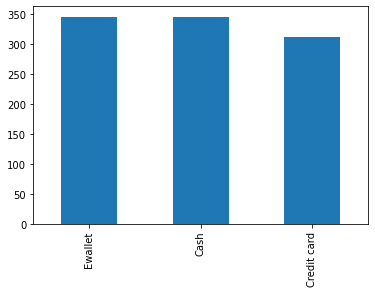

In [20]:
# 10. Analysis_2
ds_analysis_2=ds['Payment']
ds_analysis_2.value_counts().plot(kind='bar')

From the above analysis,
    It shows that, more people bought items using " Ewallet " And less people bought items using " Credit card ".